In [2]:
import os

print(os.getcwd())

C:\Users\Tasli\AppData\Roaming\SPB_Data


MemoryError: Unable to allocate array with shape (40448, 4) and data type float64

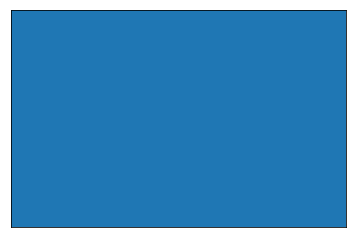

In [5]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
#from os import listdir
#from os.path import isfile, join



##FUNCTIONS
def convert_single_audio_to_image(audio_path, image_path, spectrogram_dimensions = (64,64)):
    data, sr = librosa.load(audio_path, sr = 8000)  
    
    #Make a mel spectrogram from audio
    spec = librosa.feature.melspectrogram(y=data, sr=sr)
    #Convert amplitude to decibels
    db_spec = librosa.power_to_db(spec, ref=np.max)
    fig = plt.figure()
    
    
   # fig.set_size_inches((spectrogram_dimensions[0]/fig.get_dpi(), spectrogram_dimensions[1]/fig.get_dpi()))
    
    #Display final mel spectrogram
    librosa.display.specshow(db_spec, sr=sr)
    fig.savefig(image_path)
    plt.close(fig)

    
    

#main
path = r'E:\Downloads\wav'
directories=[d for d in os.listdir(path) if os.path.isdir(os.path.join(path,d))]

#print(directories)

for ids in directories:
    outputPath = os.path.join(path,ids)
    internalDirectories = [d for d in os.listdir(os.path.join(path,ids)) if os.path.isdir(os.path.join(path,ids,d))]
    for folders in internalDirectories:
        file_names = [f for f in os.listdir(os.path.join(path,ids,folders)) if os.path.isfile(os.path.join(path,ids,folders,f)) and '.wav' in f]
        for file_name in file_names:
            audio_path = os.path.join(outputPath,folders,file_name)
            spectogram_path = os.path.join(outputPath,file_name.replace('.wav','.png'))
            convert_single_audio_to_image(audio_path,spectogram_path)

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import isfile, join




if __name__ == '__main__':
    audio_folder_path = r'C:\Users\Tasli\Desktop\free-spoken-digit-dataset-master\recordings'
    image_folder_path = r'C:\Users\Tasli\Desktop\free-spoken-digit-dataset-master\Spectros'
    
    
    file_names = [f for f in listdir(audio_folder_path) if isfile(join(audio_folder_path, f)) and '.wav' in f]
    ##Take first 20 only
    #file_names = file_names[:30]
    
    for file_name in file_names:
        print(file_name)
        audio_path = audio_folder_path + '\\' + file_name
        spectogram_path = image_folder_path + '\\' + file_name.replace('.wav', '.png')
        convert_single_audio_to_image(audio_path,spectogram_path)